# **Model: Support Vector Machine**


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/My Drive/P1_Final/"
!pip install import-ipynb
import import_ipynb

# importing helper functions for data preprocessing and model visualization
import plotlib_helper as graphplot
import datapreprocess_helper as dataprep

/content/drive/My Drive/P1_Final


####Load Preprocessed train and test data


In [ ]:
import pandas as pd
import io
import requests
import os
import numpy as np
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
path = "/content/drive/My Drive/P1_Final/"

train_read = os.path.join(path,"data/P1_Supervised_preprocess_TRAINSET.csv")
test_read = os.path.join(path,"data/P1_Supervised_preprocess_TESTSET.csv")
df_train = pd.read_csv(train_read)
df_test= pd.read_csv(test_read)

####Load train data


In [ ]:
y_train=df_train.label
y_train=y_train.to_numpy()
attack = dataprep.encode_text_index(df_train,'label')

x_train=df_train.drop('label', axis=1)
x_train=x_train.to_numpy()

print(attack)



[0 1]


In [ ]:
x_train.shape

(81173, 65)

In [ ]:
y_train.shape

(81173,)

####Load test data


In [ ]:
y_test=df_test.label
y_test=y_test.to_numpy()
x_test=df_test.drop('label', axis=1)
x_test=x_test.to_numpy()



In [ ]:
x_test.shape

(35179, 65)

In [ ]:
y_test.shape

(35179,)

####Import Model:Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics 


####Instantiate Model


In [ ]:
# instantiate the model 
model_svm = SVC()

In [ ]:
# fit the model with data
model_svm.fit(x_train, y_train)     # X must be a Matrix,  y must be 1-d array


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
pred=model_svm.predict(x_test)


#### Classification Report

In [ ]:

print(graphplot.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      9625
           1       1.00      1.00      1.00     25554

    accuracy                           1.00     35179
   macro avg       1.00      1.00      1.00     35179
weighted avg       1.00      1.00      1.00     35179



#### Plot Confusion Matrix


[[ 9563    62]
 [    0 25554]]
Plotting confusion matrix


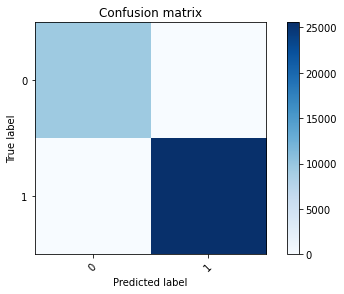

In [ ]:

# Compute confusion matrix
cm = graphplot.confusion_matrix(y_test, pred)
print(cm)
print('Plotting confusion matrix')

graphplot.plt.figure()
graphplot.plot_confusion_matrix(cm, attack)
graphplot.plt.show()


#### Plot ROC Curve

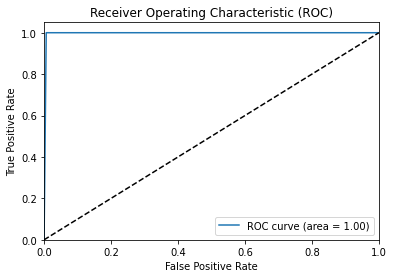

In [ ]:
graphplot.plot_roc(pred,y_test)